In [83]:
import numpy.matlib
import numpy as np
import matplotlib.pyplot as plt

In [84]:
"""Generate the ground truth and sensor measurement signals.
ground truth: x = t^2
measurement:  z = t^2 + normal(0, 1)
"""
t = np.arange(start=0, stop=1, step=0.01)
x = [i**2 for i in t]
# z1 = [i**2 + np.random.normal(loc=0.0, scale=1) for i in t]
# z2 = [i**2 + np.random.normal(loc=0.0, scale=0.8) for i in t]
Z = [np.asmatrix([[i**2 + np.random.normal(0.0, 1)  ],
                  [i**2 + np.random.normal(0.0, 0.8)]], dtype=float) for i in t]

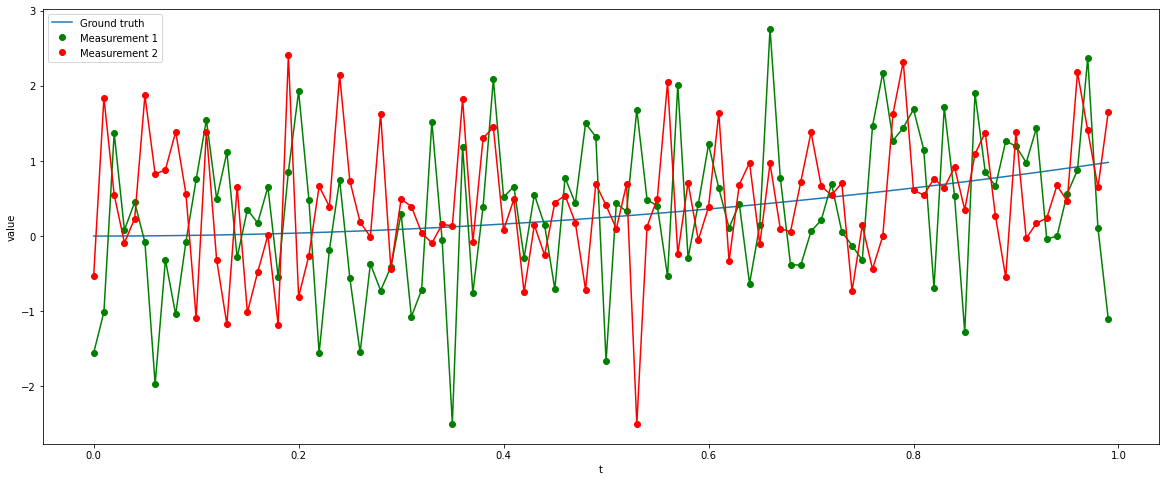

In [85]:
# Visualize the generated signals
z1 = np.squeeze(np.asarray(Z))[:, 0]
z2 = np.squeeze(np.asarray(Z))[:, 1]

plt.figure(figsize=(20, 8))
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, x, label='Ground truth')
plt.plot(t, z1, 'g')
plt.plot(t, z1, 'go', label='Measurement 1')
plt.plot(t, z2, 'r')
plt.plot(t, z2, 'ro', label='Measurement 2')
plt.legend()
plt.show()

In [86]:
"""Sensor fusion(2 sensor):
prediction func:
x(k)   = x(k-1)   + x'(k-1)*dt + x''(k-1)*(dt)^2 * (1/2!)  + Q1
x'(k)  = 0*x(k-1) + x'(k-1)    + x''(k-1)*dt               + Q2
x''(k) = 0*x(k-1) + 0*x'(k-1)  + x''(k-1)                  + Q3
X(k) = [x(k), x'(k), x''(k)].T
F = [[1, dt, 0.5*dt^2],
     [0,  1,     dt  ],
     [0,  0,      1  ]]
Q = [[Q1,  0,   0],
     [0,  Q2,   0],
     [0,   0,  Q3]]
Q1 ~ N(0, 1); Q2 ~ N(0, 0.01); Q3 ~ N(0, 0.001)
X(k) = F*X(k-1) + Q

measurement func:
z1(k) = x(k) + R1
z2(k) = x(k) + R2
Z(k) = [z1(k), z2(k)].T
H = [[1, 0, 0],
     [1, 0, 0]]
R = [[R1,  0],
     [0,  R2]]
R1 ~ N(0, 1); R2 ~ N(0, 0.8)
Z(k) = H*X(k) + R
"""
# Setup init value
X_fused = [] # used to stored the fused value
P_fused = [] # used to stored the variance

X_posterior_last_time = np.matlib.ones(shape=(3, 1), dtype=float)
P_posterior_last_time = np.matrix([[1**2,   0,       0  ],
                                   [ 0,   0.8**2,    0  ],
                                   [ 0,     0,    0.3**2]], dtype=float)
X_fused.append(X_posterior_last_time)
P_fused.append(P_posterior_last_time)

dt = t[1] - t[0]
F = np.matrix([[1, dt, 0.5*dt**2],
               [0,  1,    dt    ],
               [0,  0,    1     ]], dtype=float)
H = np.matrix([[1, 0, 0],
               [1, 0, 0]], dtype=float)
Q = np.matrix([[1,  0,   0  ],
               [0, 0.01, 0  ],
               [0,  0, 0.001]], dtype=float)
R = np.matrix([[1,  0 ],
               [0, 0.8]], dtype=float)

In [87]:
# Start the sensor fusion using Kalman filter
for i in range(1, len(t)):
    X_prior = F * X_posterior_last_time
    P_prior = F * P_posterior_last_time * F.T + Q

    K = (P_prior * H.T) * np.linalg.inv(H * P_prior * H.T + R)
    X_posterior = X_prior + K * (Z[i] - H * X_prior)
    P_posterior = (np.matlib.identity(n=3, dtype=float) - K * H) * P_prior

    X_fused.append(X_posterior)
    P_fused.append(P_posterior)

    X_posterior_last_time = X_posterior
    P_posterior_last_time = P_posterior

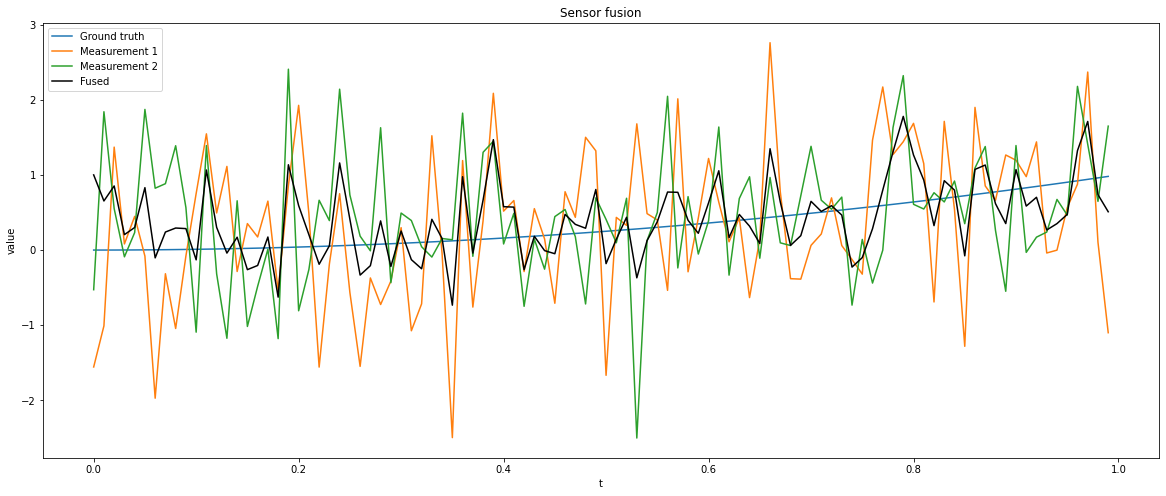

In [88]:
# Visualize the sensor fusion result
plt.figure(figsize=(20, 8))
plt.title('Sensor fusion')
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, x, label='Ground truth')
plt.plot(t, z1, label='Measurement 1')
plt.plot(t, z2, label='Measurement 2')
plt.plot(t, np.asarray(X_fused)[:, 0, 0], 'black', label='Fused')
plt.legend()
plt.show()